In [ ]:
#default_exp dataset

In [ ]:
%load_ext autoreload
%autoreload 2

# Dataset

> This files holds functions to create a plant pathology dataset.

In [ ]:
#hide
from nbdev.showdoc import *
from plant_pathology.config import TEST_DATA_PATH

In [ ]:
#export
from fastai.vision.all import *
from plant_pathology.utils import *
from typing import *

## Building DataBlock

In [ ]:
#export
def get_datablock(path: Path, df: pd.DataFrame, presize: int,
                  resize: int, val_fold: int=4) -> DataBlock:
    def get_y(row): return df.columns[row==1][0]
    return DataBlock(blocks=(ImageBlock, CategoryBlock),
                get_x=ColReader("image_id", pref=path/'images', suff=".jpg"),
                get_y=get_y,
                splitter=MaskSplitter(df["fold"]==val_fold),
                item_tfms=Resize(presize),
                batch_tfms=aug_transforms(mult=1.5, max_rotate=22.5, min_zoom=0.9,
                                         size=resize, min_scale=0.5, flip_vert=True,
                                         max_zoom=1.2))

In [ ]:
path, df = load_data(TEST_DATA_PATH, with_folds=True); df.head()

,image_id,healthy,multiple_diseases,rust,scab,fold
0,Train_0,0,0,1,0,0
1,Train_1,1,0,0,0,1
2,Train_2,1,0,0,0,2
3,Train_3,0,0,1,0,3
4,Train_4,1,0,0,0,4


In [ ]:
data = get_datablock(path, df, 128, 64)

## Building DataLoaders

In [ ]:
#export
def get_dls(path: Path, df: pd.DataFrame, presize: Union[tuple, int]=(682, 1024),
            resize: int=256, bs: int=256, val_fold: int=4) -> DataLoaders:
    return get_datablock(path, df, presize, resize, val_fold).dataloaders(df, bs=bs)

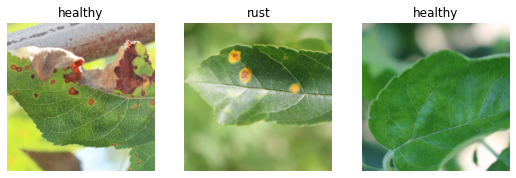

In [ ]:
dls = get_dls(path, df, bs=3)
dls.show_batch()

In [ ]:
#hide
# Test validation split was done correctly
test_eq(len(dls.train_ds), 4)
test_eq(len(dls.valid_ds), 1)

## All-in-One Function to Load DataLoaders

In [ ]:
#export
@delegates(get_dls)
def get_dls_all_in_1(data_path: Path, pseudo_labels_path: str=None, **kwargs) -> DataLoaders:
    path, df = load_data(data_path, with_folds=True, pseudo_labels_path=pseudo_labels_path)
    return get_dls(path, df, **kwargs)

Setting `val_fold` to something invalid (i.e. something not in 0 -> 4) puts all the data into the train set.

In [ ]:
dls = get_dls_all_in_1(TEST_DATA_PATH, val_fold=-1, bs=3)
len(dls.train_ds), len(dls.valid_ds)

(5, 0)

In [ ]:
#hide
# Test that setting non-existent validation fold puts all examples in train DataLoader 
test_eq(len(dls.valid), 0)

In [ ]:
#hide
from nbdev.export import notebook2script; notebook2script()

Converted 00_utils.ipynb.
Converted 01_dataset.ipynb.
Converted 02_evaluate.ipynb.
Converted 03_train.ipynb.
Converted 04_generate_pseudo_labels.ipynb.
Converted 05_self_knowledge_distillation.ipynb.
Converted 06_create_folds.ipynb.
Converted 07_pretrained_models.ipynb.
Converted config.ipynb.
Converted index.ipynb.
